In [20]:
#!pip install scrublet
#!pip install pyreadr
#!pip install rpy2
!pip install h5py scipy

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
import sys
import os
import scrublet as scr
import scipy.io
import pandas as pd
import scipy.io
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import numpy as np
import umap
import numba
import numba.typed

# If using a Jupyter notebook, include the line %matplotlib inline below the imports.
%matplotlib inline

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

# CANAI_HSUE_1029

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 23.3%
Estimated detectable doublet fraction = 46.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 50.0%
Elapsed time: 29.1 seconds
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 1.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 47.5%
Running UMAP...
Done.


,Classification,Droplet N
0,singlet,9157
1,doublet,67


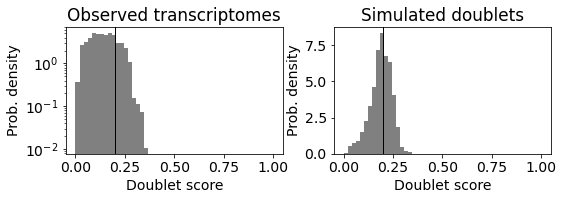

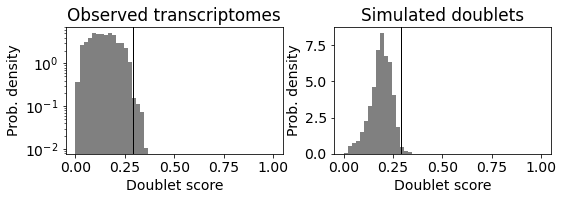

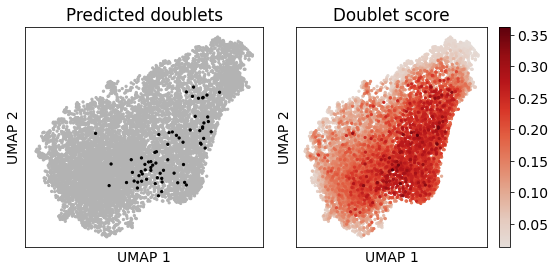

In [7]:
## Set up parameters and variables ##
counts_matrix_dir = "/volume/SAMPLE_1/data/"
outdir = "/volume/SAMPLE_1/data/scrublet_out/"

counts_matrix = scipy.io.mmread(counts_matrix_dir + 'matrix.mtx.gz').T.tocsc()
barcodes_df = pd.read_csv(counts_matrix_dir + 'barcodes.tsv.gz',sep='\t',header=None)

scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

scrub.plot_histogram()
### Plotting and saving
scrub.call_doublets(threshold=0.29)
scrub.plot_histogram();
plt.savefig(os.path.join(outdir,'doublet_score_histogram.png'))
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done.')
scrub.plot_embedding('UMAP', order_points=True);
plt.savefig(os.path.join(outdir,'UMAP.png'))

results = pd.Series(scrub.predicted_doublets_, name="scrublet_DropletType")
scores = pd.Series(scrub.doublet_scores_obs_, name="scrublet_Scores")
dataframe = pd.concat([barcodes_df, results, scores], axis=1)
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(True, "doublet")
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(False, "singlet")

dataframe.to_csv(os.path.join(outdir,'scrublet_results.tsv'), sep = "\t", index = False)

### Make summary of singlets and doublets and write to file ###
summary = pd.DataFrame(dataframe.scrublet_DropletType.value_counts())
summary.index.name = 'Classification'
summary.reset_index(inplace=True)
summary = summary.rename({'scrublet_DropletType': 'Droplet N'}, axis=1)

summary.to_csv(os.path.join(outdir,'scrublet_summary.tsv'), sep = "\t", index = False)

summary

# CANAI_HSUE_1514

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 23.7 seconds
Detected doublet rate = 4.0%
Estimated detectable doublet fraction = 12.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 32.9%
Running UMAP...
Done.


,Classification,Droplet N
0,singlet,7273
1,doublet,304


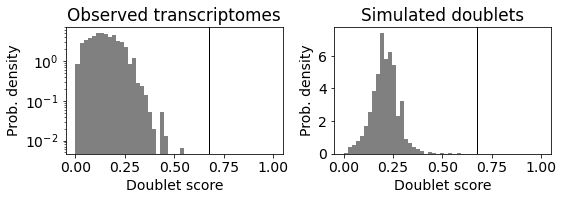

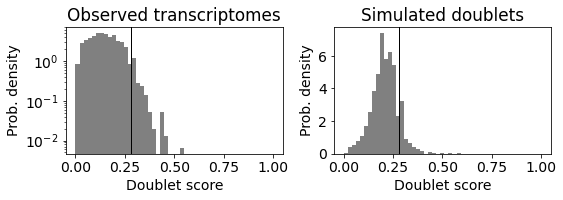

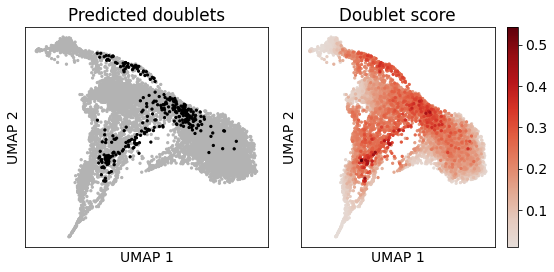

In [14]:
## Set up parameters and variables ##
counts_matrix_dir = "/volume/SAMPLE_2/data/"
outdir = "/volume/SAMPLE_2/data/scrublet_out/"

counts_matrix = scipy.io.mmread(counts_matrix_dir + 'matrix.mtx.gz').T.tocsc()
barcodes_df = pd.read_csv(counts_matrix_dir + 'barcodes.tsv.gz',sep='\t',header=None)

scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

scrub.plot_histogram()
### Plotting and saving
scrub.call_doublets(threshold=0.28)
scrub.plot_histogram();
plt.savefig(os.path.join(outdir,'doublet_score_histogram.png'))
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done.')
scrub.plot_embedding('UMAP', order_points=True);
plt.savefig(os.path.join(outdir,'UMAP.png'))

results = pd.Series(scrub.predicted_doublets_, name="scrublet_DropletType")
scores = pd.Series(scrub.doublet_scores_obs_, name="scrublet_Scores")
dataframe = pd.concat([barcodes_df, results, scores], axis=1)
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(True, "doublet")
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(False, "singlet")

dataframe.to_csv(os.path.join(outdir,'scrublet_results.tsv'), sep = "\t", index = False)

### Make summary of singlets and doublets and write to file ###
summary = pd.DataFrame(dataframe.scrublet_DropletType.value_counts())
summary.index.name = 'Classification'
summary.reset_index(inplace=True)
summary = summary.rename({'scrublet_DropletType': 'Droplet N'}, axis=1)

summary.to_csv(os.path.join(outdir,'scrublet_summary.tsv'), sep = "\t", index = False)

summary

# SCOPE_DEEKS_1940

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 70.0%
Elapsed time: 21.9 seconds
Detected doublet rate = 3.5%
Estimated detectable doublet fraction = 5.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 67.8%
Running UMAP...
Done.


,Classification,Droplet N
0,singlet,6532
1,doublet,239


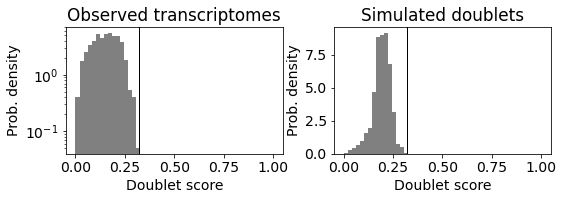

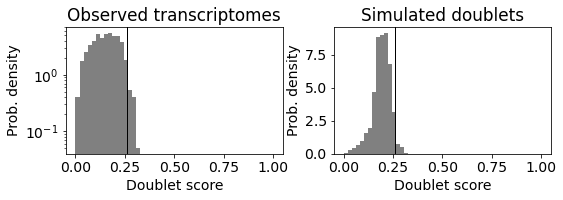

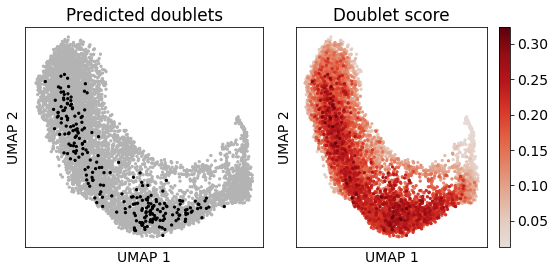

In [5]:
## Set up parameters and variables ##
counts_matrix_dir = "/volume/SAMPLE_3/data/"
outdir = "/volume/SAMPLE_3/data/scrublet_out/"

counts_matrix = scipy.io.mmread(counts_matrix_dir + 'matrix.mtx.gz').T.tocsc()
barcodes_df = pd.read_csv(counts_matrix_dir + 'barcodes.tsv.gz',sep='\t',header=None)

scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

scrub.plot_histogram()
### Plotting and saving
scrub.call_doublets(threshold=0.26)
scrub.plot_histogram();
plt.savefig(os.path.join(outdir,'doublet_score_histogram.png'))
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done.')
scrub.plot_embedding('UMAP', order_points=True);
plt.savefig(os.path.join(outdir,'UMAP.png'))

results = pd.Series(scrub.predicted_doublets_, name="scrublet_DropletType")
scores = pd.Series(scrub.doublet_scores_obs_, name="scrublet_Scores")
dataframe = pd.concat([barcodes_df, results, scores], axis=1)
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(True, "doublet")
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(False, "singlet")

dataframe.to_csv(os.path.join(outdir,'scrublet_results.tsv'), sep = "\t", index = False)

### Make summary of singlets and doublets and write to file ###
summary = pd.DataFrame(dataframe.scrublet_DropletType.value_counts())
summary.index.name = 'Classification'
summary.reset_index(inplace=True)
summary = summary.rename({'scrublet_DropletType': 'Droplet N'}, axis=1)

summary.to_csv(os.path.join(outdir,'scrublet_summary.tsv'), sep = "\t", index = False)

summary

# SCOPE_DEEKS_2185

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.08
Detected doublet rate = 90.0%
Estimated detectable doublet fraction = 96.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 93.3%
Elapsed time: 18.9 seconds
Detected doublet rate = 9.6%
Estimated detectable doublet fraction = 11.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 82.2%
Running UMAP...
Done.


,Classification,Droplet N
0,singlet,3750
1,doublet,400


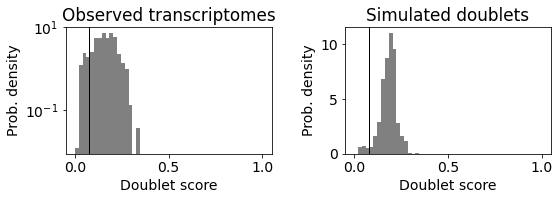

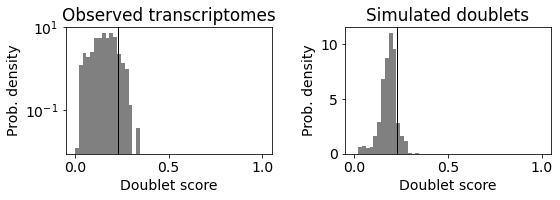

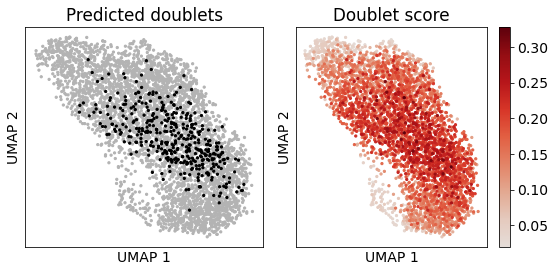

In [9]:
## Set up parameters and variables ##
counts_matrix_dir = "/volume/SAMPLE_4/data/"
outdir = "/volume/SAMPLE_4/data/scrublet_out/"

counts_matrix = scipy.io.mmread(counts_matrix_dir + 'matrix.mtx.gz').T.tocsc()
barcodes_df = pd.read_csv(counts_matrix_dir + 'barcodes.tsv.gz',sep='\t',header=None)

scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

scrub.plot_histogram()
### Plotting and saving
scrub.call_doublets(threshold=0.23)
scrub.plot_histogram();
plt.savefig(os.path.join(outdir,'doublet_score_histogram.png'))
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done.')
scrub.plot_embedding('UMAP', order_points=True);
plt.savefig(os.path.join(outdir,'UMAP.png'))

results = pd.Series(scrub.predicted_doublets_, name="scrublet_DropletType")
scores = pd.Series(scrub.doublet_scores_obs_, name="scrublet_Scores")
dataframe = pd.concat([barcodes_df, results, scores], axis=1)
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(True, "doublet")
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(False, "singlet")

dataframe.to_csv(os.path.join(outdir,'scrublet_results.tsv'), sep = "\t", index = False)

### Make summary of singlets and doublets and write to file ###
summary = pd.DataFrame(dataframe.scrublet_DropletType.value_counts())
summary.index.name = 'Classification'
summary.reset_index(inplace=True)
summary = summary.rename({'scrublet_DropletType': 'Droplet N'}, axis=1)

summary.to_csv(os.path.join(outdir,'scrublet_summary.tsv'), sep = "\t", index = False)

summary

# CANAI_HSUE_2642

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 57.1%
Elapsed time: 25.6 seconds
Detected doublet rate = 2.1%
Estimated detectable doublet fraction = 4.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 47.4%
Running UMAP...
Done.


,Classification,Droplet N
0,singlet,7839
1,doublet,166


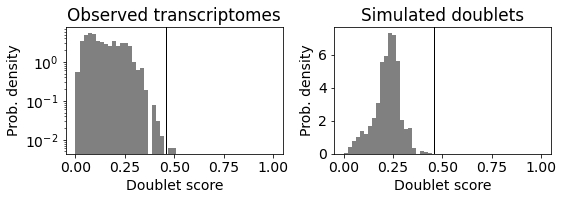

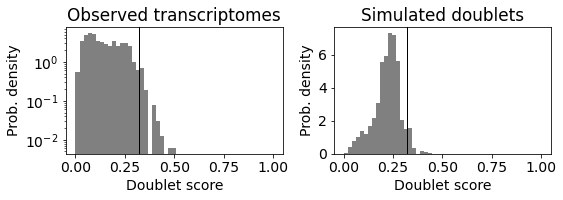

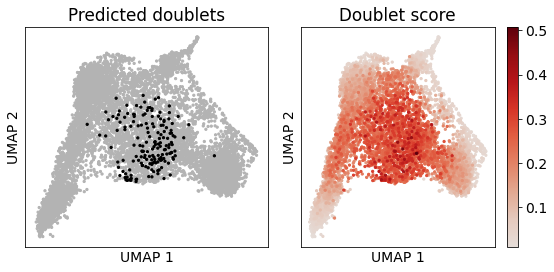

In [8]:
## Set up parameters and variables ##
counts_matrix_dir = "/volume/SAMPLE_5/data/"
outdir = "/volume/SAMPLE_5/data/scrublet_out/"

counts_matrix = scipy.io.mmread(counts_matrix_dir + 'matrix.mtx.gz').T.tocsc()
barcodes_df = pd.read_csv(counts_matrix_dir + 'barcodes.tsv.gz',sep='\t',header=None)

scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

scrub.plot_histogram()
### Plotting and saving
scrub.call_doublets(threshold=0.32)
scrub.plot_histogram();
plt.savefig(os.path.join(outdir,'doublet_score_histogram.png'))
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done.')
scrub.plot_embedding('UMAP', order_points=True);
plt.savefig(os.path.join(outdir,'UMAP.png'))

results = pd.Series(scrub.predicted_doublets_, name="scrublet_DropletType")
scores = pd.Series(scrub.doublet_scores_obs_, name="scrublet_Scores")
dataframe = pd.concat([barcodes_df, results, scores], axis=1)
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(True, "doublet")
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(False, "singlet")

dataframe.to_csv(os.path.join(outdir,'scrublet_results.tsv'), sep = "\t", index = False)

### Make summary of singlets and doublets and write to file ###
summary = pd.DataFrame(dataframe.scrublet_DropletType.value_counts())
summary.index.name = 'Classification'
summary.reset_index(inplace=True)
summary = summary.rename({'scrublet_DropletType': 'Droplet N'}, axis=1)

summary.to_csv(os.path.join(outdir,'scrublet_summary.tsv'), sep = "\t", index = False)

summary

# SCOPE_DEEKS_6501

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.13
Detected doublet rate = 47.2%
Estimated detectable doublet fraction = 87.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 53.9%
Elapsed time: 33.2 seconds
Detected doublet rate = 2.8%
Estimated detectable doublet fraction = 8.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 34.7%
Running UMAP...
Done.


,Classification,Droplet N
0,singlet,8768
1,doublet,251


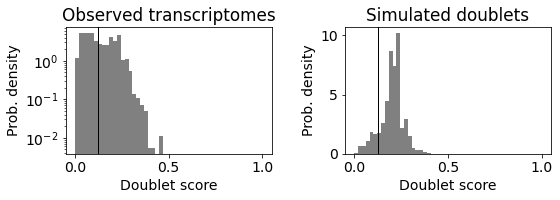

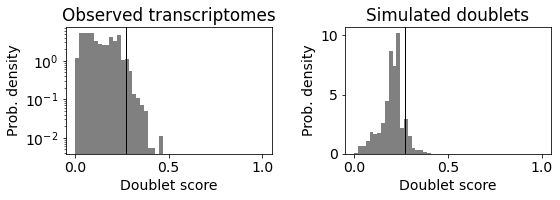

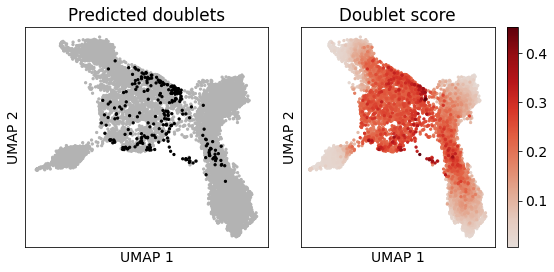

In [19]:
## Set up parameters and variables ##
counts_matrix_dir = "/volume/SAMPLE_6/data/"
outdir = "/volume/SAMPLE_6/data/scrublet_out/"

counts_matrix = scipy.io.mmread(counts_matrix_dir + 'matrix.mtx.gz').T.tocsc()
barcodes_df = pd.read_csv(counts_matrix_dir + 'barcodes.tsv.gz',sep='\t',header=None)

scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

scrub.plot_histogram()
### Plotting and saving
scrub.call_doublets(threshold=0.27)
scrub.plot_histogram();
plt.savefig(os.path.join(outdir,'doublet_score_histogram.png'))
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
print('Done.')
scrub.plot_embedding('UMAP', order_points=True);
plt.savefig(os.path.join(outdir,'UMAP.png'))

results = pd.Series(scrub.predicted_doublets_, name="scrublet_DropletType")
scores = pd.Series(scrub.doublet_scores_obs_, name="scrublet_Scores")
dataframe = pd.concat([barcodes_df, results, scores], axis=1)
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(True, "doublet")
dataframe.scrublet_DropletType = dataframe.scrublet_DropletType.replace(False, "singlet")

dataframe.to_csv(os.path.join(outdir,'scrublet_results.tsv'), sep = "\t", index = False)

### Make summary of singlets and doublets and write to file ###
summary = pd.DataFrame(dataframe.scrublet_DropletType.value_counts())
summary.index.name = 'Classification'
summary.reset_index(inplace=True)
summary = summary.rename({'scrublet_DropletType': 'Droplet N'}, axis=1)

summary.to_csv(os.path.join(outdir,'scrublet_summary.tsv'), sep = "\t", index = False)

summary